In [2]:
import pandas as pd

file_path = '/home/agusitn/Documents/projects/blue-dollar-ml/data/processed/info_finally.csv'

df = pd.read_csv(file_path, index_col='fecha', parse_dates=True)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.tail()


,valor
fecha,
2025-04-02,1315.0
2025-04-03,1310.0
2025-04-04,1310.0
2025-04-05,1310.0
2025-04-06,1310.0


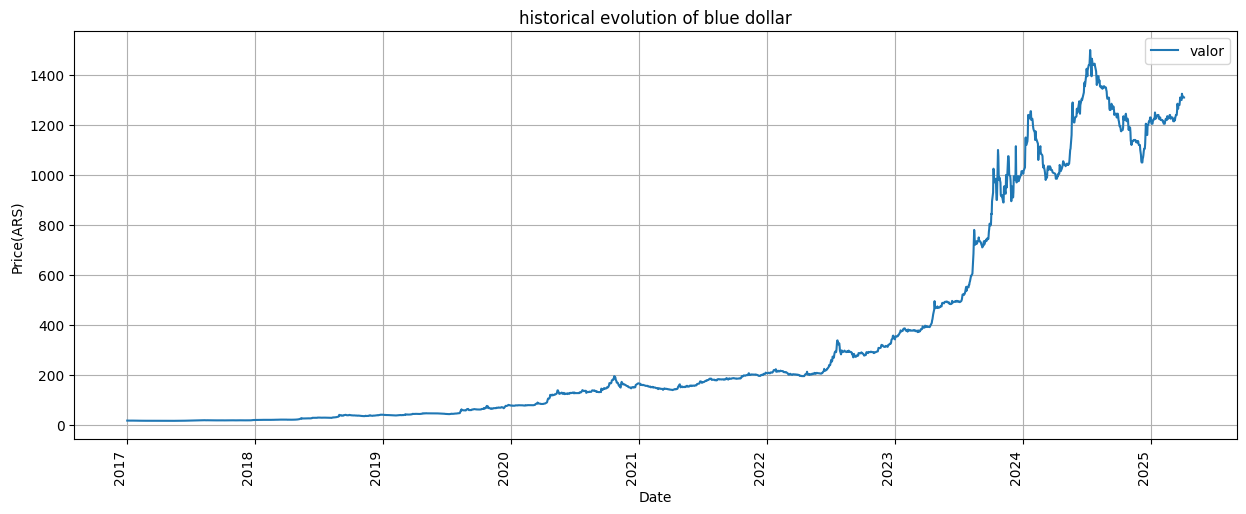

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#create graphic
ax = df.plot(figsize=(15,6), title="historical evolution of blue dollar")

ax.xaxis.set_major_locator(mdates.YearLocator(1))

#aesthetics
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Price(ARS)')
plt.grid(True)

plt.show()

In [4]:
import pandas as pd

df['delta'] = df['valor'].diff()
df['returns'] = df['valor'].pct_change()

df.head()

,valor,delta,returns
fecha,,,
2017-01-02,16.99,NaN,NaN
2017-01-03,17.11,0.12,0.007063
2017-01-04,16.96,-0.15,-0.008767
2017-01-05,16.87,-0.09,-0.005307
2017-01-06,16.86,-0.01,-0.000593


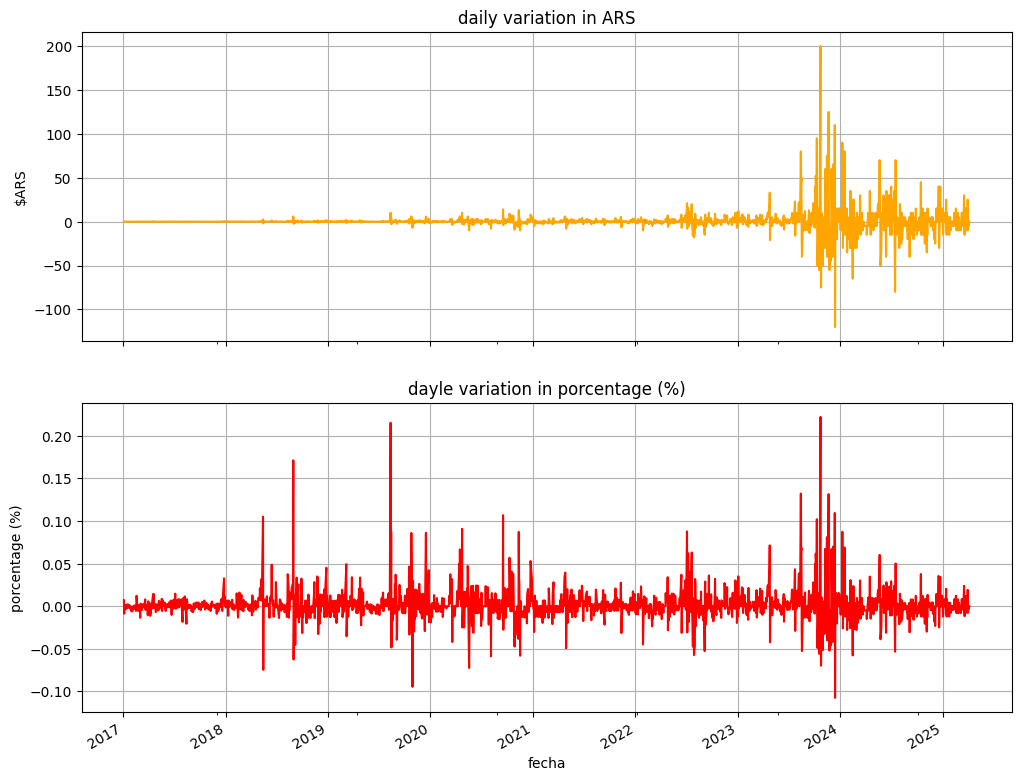

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)

df['delta'].plot(ax=ax1, color='orange')
ax1.set_title("daily variation in ARS")
ax1.set_ylabel('$ARS')
ax1.grid(True)

df['returns'].plot(ax=ax2, color='red')
ax2.set_title("dayle variation in porcentage (%)")
ax2.set_ylabel('porcentage (%)')
ax2.grid(True)

plt.show()

In [6]:
import pandas as pd

record_date = df['returns'].idxmax()
record_value = df['returns'].max()

print(f'El año con mayor aumento del dolar blue fue: {record_date}')
print(f'El porcentaje fue: {record_value}')

El año con mayor aumento del dolar blue fue: 2023-10-23 00:00:00
El porcentaje fue: 0.22222222222222232


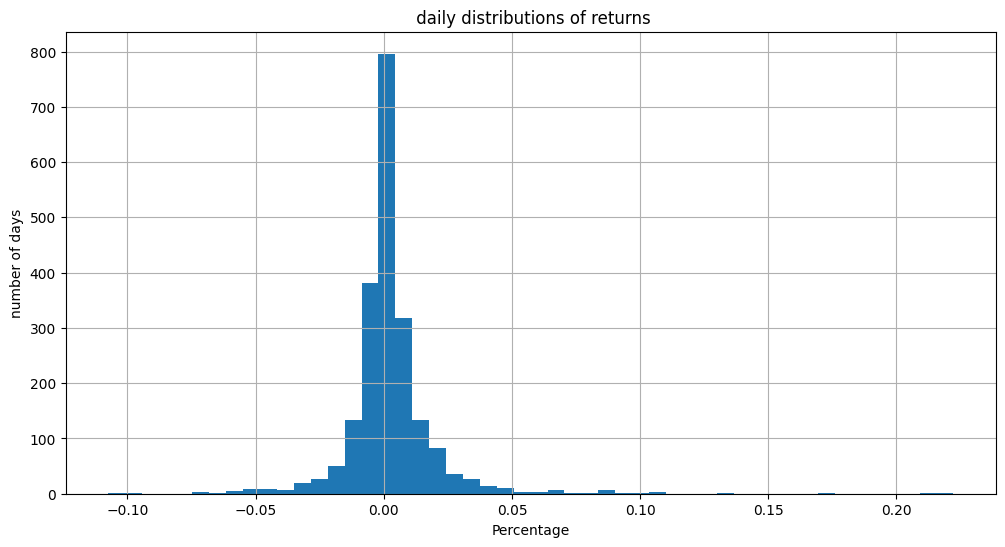

'\nNotas: \n- El Pico Central: Una barra muy alta en el 0 (o cerca). Eso te dice que la gran mayoría de los días, el dólar blue no se mueve mucho.\n- La "Cola" a la Derecha: Verás que el gráfico se estira hacia la derecha. Esos son los días de crisis o devaluaciones fuertes. En finanzas, esto se llama "Right Skew" (sesgo a la derecha).\n- La falta de Izquierda: Verás que casi no hay nada a la izquierda del cero. Esto confirma algo que todo argentino sabe: el dólar blue casi nunca baja de precio de forma significativa.\n'

In [7]:
import matplotlib.pyplot as plt

df['returns'].plot(kind='hist', bins=50, figsize=(12,6), title=" daily distributions of returns")

plt.xlabel("Percentage")
plt.ylabel("number of days")
plt.grid(True)

plt.show()

"""
Notas: 
- El Pico Central: Una barra muy alta en el 0 (o cerca). Eso te dice que la gran mayoría de los días, el dólar blue no se mueve mucho.
- La "Cola" a la Derecha: Verás que el gráfico se estira hacia la derecha. Esos son los días de crisis o devaluaciones fuertes. En finanzas, esto se llama "Right Skew" (sesgo a la derecha).
- La falta de Izquierda: Verás que casi no hay nada a la izquierda del cero. Esto confirma algo que todo argentino sabe: el dólar blue casi nunca baja de precio de forma significativa.
"""

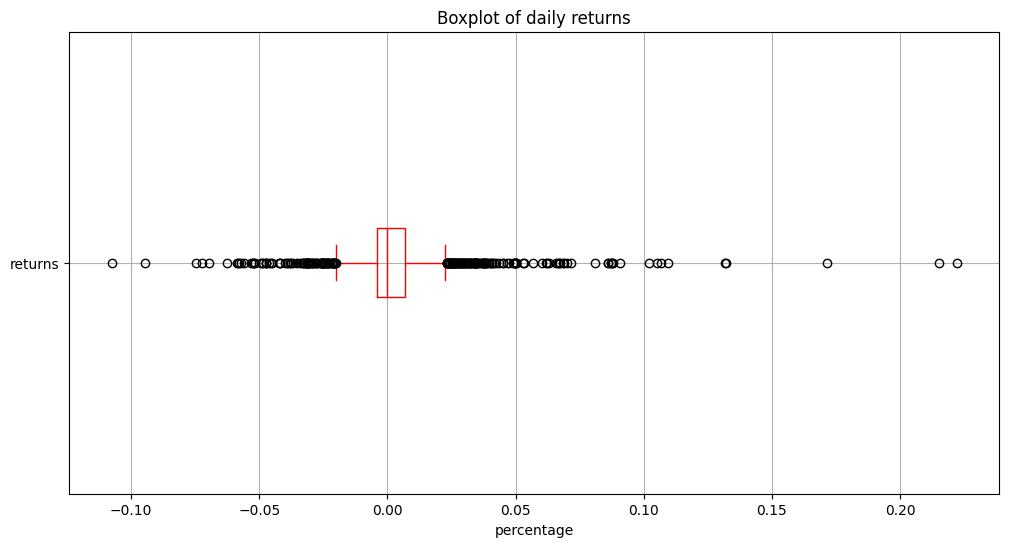

'\ncaja muy apretada cerca del 0 (porque la mayoría de los días el dólar no se mueve mucho).\nPero vas a ver muchos puntos negros (outliers) hacia la derecha.\nCada uno de esos puntos es un día donde el dólar saltó muchísimo más de lo normal.\n'

In [8]:
import matplotlib.pyplot as plt 

df.boxplot(column='returns', vert=False, figsize=(12,6), color='red')

plt.title("Boxplot of daily returns")
plt.xlabel("percentage")

plt.show()

"""
caja muy apretada cerca del 0 (porque la mayoría de los días el dólar no se mueve mucho).
Pero vas a ver muchos puntos negros (outliers) hacia la derecha.
Cada uno de esos puntos es un día donde el dólar saltó muchísimo más de lo normal.
"""

In [9]:
filter_crisis = df['returns'] > 0.10

crazy_days = df[filter_crisis].copy()

ranking_crisis = crazy_days.sort_values(by='returns', ascending=False)

print("--- TOP 10 DIAS DE MAYOR DEVALUACION --- ")
print((ranking_crisis['returns']*100).head(10))

--- TOP 10 DIAS DE MAYOR DEVALUACION --- 
fecha
2023-10-23    22.222222
2019-08-12    21.535181
2018-08-30    17.130307
2023-08-14    13.223140
2023-11-21    13.157895
2023-12-13    10.945274
2020-09-16    10.687023
2018-05-14    10.515464
2023-10-10    10.215054
Name: returns, dtype: float64


In [10]:
# 1. Count how many values are missing per column
print("--- Cantidad de datos nulos por columna ---")
print(df.isna().sum())

# 2. Inspect rows that contain missing values
filas_con_nulos = df[df.isna().any(axis=1)]

print("\n--- Primeras filas con datos faltantes ---")
print(filas_con_nulos.head())

# Check whether there are duplicate dates in the index
duplicados_fecha = df.index.duplicated().sum()

print(f"\nCantidad de fechas duplicadas: {duplicados_fecha}")

if duplicados_fecha > 0:
    print("Muestra de fechas duplicadas:")
    print(df[df.index.duplicated()].head())

--- Cantidad de datos nulos por columna ---
valor      0
delta      1
returns    1
dtype: int64

--- Primeras filas con datos faltantes ---
            valor  delta  returns
fecha                            
2017-01-02  16.99    NaN      NaN

Cantidad de fechas duplicadas: 1
Muestra de fechas duplicadas:
            valor  delta   returns
fecha                             
2023-09-25  743.0   -2.0 -0.002685


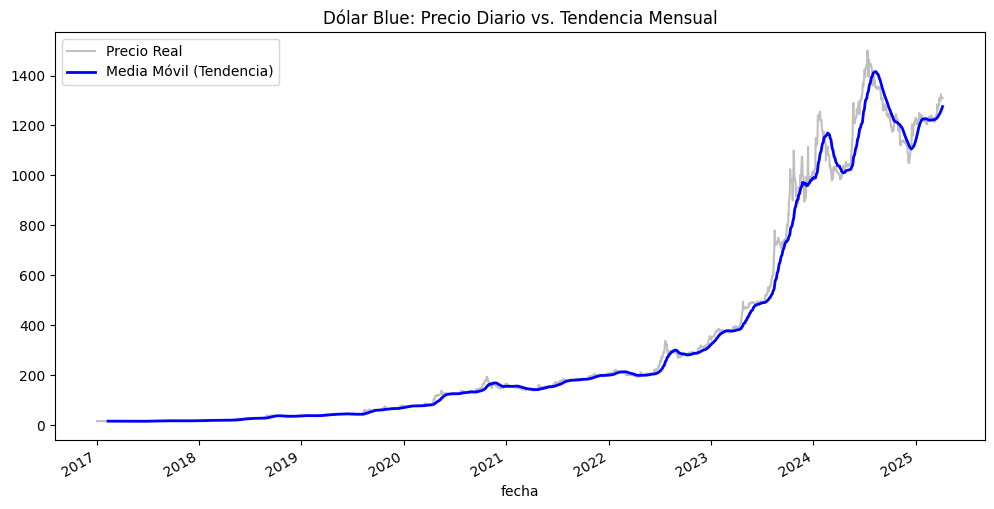

In [11]:
import matplotlib.pyplot as plt

# 1. Compute the 30-day moving average
# "Take the last 30 data points and average them"
df['promedio_30_dias'] = df['valor'].rolling(window=30).mean()

# 2. Plot to compare the series
plt.figure(figsize=(12, 6))

# Actual price (alpha=0.5 for a smoother look)
df['valor'].plot(label='Precio Real', alpha=0.5, color='gray')

# Moving average (solid line)
df['promedio_30_dias'].plot(label='Media Móvil (Tendencia)', color='blue', linewidth=2)

plt.title('Dólar Blue: Precio Diario vs. Tendencia Mensual')
plt.legend()
plt.show()

In [12]:
""" 
De esta forma voy a dividir los datos en dos clases:
Sube el dolar o baja el dolar
Siendo 1 como que el dolar sube y 0 el dolar baja 
"""


# This would be (y)
df['target_up'] = (df['returns'] > 0).astype(int)

# This would be (x): knowledge available up to day t-1
df['lag_1'] = df['returns'].shift(1)


# Drop the NaN values
df.dropna(inplace=True)




In [13]:
"""Calculo la cantidad de lineas del csv"""

total_lines = 0

with open('/home/agusitn/Documents/projects/blue-dollar-ml/data/processed/info_finally.csv', 'r') as file:
    for i in file:
        total_lines = total_lines + 1

print(f'El csv tiene:{total_lines} lineas')


"""Calculo el 70% del total de las lineas"""

index_train = int(total_lines * 0.7)
print(f'El 70% de las lineas son: {index_train} lineas')


""" 85% de las lineas (75% + 15%)"""
index_val = int(total_lines * 0.85)
print(f'El 85% de las lineas son: {index_val}')


import pandas as pd


# 70% of the data to train the model
df_train = df.iloc[0:index_train]
# 85% of the data
df_val = df.iloc[index_train:index_val]
# 100% of the data
df_test = df.iloc[index_val:]

print(f"Total original: {total_lines}")
print(f"Suma de las partes: {len(df_train) + len(df_val) + len(df_test)}")
print(f"\nFechas Train: {df_train.index.min()} a {df_train.index.max()}")
print(f"Fechas Val:   {df_val.index.min()} a {df_val.index.max()}")
print(f"Fechas Test:  {df_test.index.min()} a {df_test.index.max()}")



El csv tiene:2095 lineas
El 70% de las lineas son: 1466 lineas
El 85% de las lineas son: 1780
Total original: 2095
Suma de las partes: 2065

Fechas Train: 2017-02-10 00:00:00 a 2023-02-10 00:00:00
Fechas Val:   2023-02-13 00:00:00 a 2024-05-28 00:00:00
Fechas Test:  2024-05-29 00:00:00 a 2025-04-06 00:00:00


Tenemos que responder una pregunta simple: ¿Le puedes ganar a una estrategia tonta?

En el caso del Dólar Blue, que es tan volátil, hay dos estrategias "tontas" clásicas contra las que competir:

    "Siempre Sube" (Majority Class): Como en Argentina hay inflación constante, apostar siempre a que sube suele tener una tasa de acierto alta.

"Como Ayer" (Random Walk): Asumir que lo que pasó ayer, pasará hoy. Si ayer subió, hoy sube. Si ayer bajó, hoy baja.

Si tu futuro modelo de Machine Learning saca un 55% de acierto, pero el baseline "Siempre Sube" tiene un 60%, tu modelo no sirve.

In [14]:
"""
Definimos que columnas son las features (x) y cuales son los targets (y)
Preparamos las matrices de entrenamiento y las matrices de testing
"""

features = ['lag_1']
target = 'target_up'

x_train = df_train[features]
y_train = df_train[target]

x_test = df_test[features]
y_test = df_test[target]

print(x_test, y_test)




               lag_1
fecha               
2024-05-29  0.000000
2024-05-30  0.008264
2024-05-31  0.008197
2024-06-03  0.000000
2024-06-04  0.004065
...              ...
2025-04-02 -0.007547
2025-04-03  0.000000
2025-04-04 -0.003802
2025-04-05  0.000000
2025-04-06  0.000000

[285 rows x 1 columns] fecha
2024-05-29    1
2024-05-30    1
2024-05-31    0
2024-06-03    1
2024-06-04    1
             ..
2025-04-02    0
2025-04-03    0
2025-04-04    0
2025-04-05    0
2025-04-06    0
Name: target_up, Length: 285, dtype: int64


In [15]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from src.blue_dollar_ml.models.baselines import AlwaysUp, SameAsYesterday
from sklearn.metrics import accuracy_score

model_1 = AlwaysUp()
predic_1 = model_1.predict(x_test)
acc_1 = accuracy_score(y_test, predic_1)

print(f"Siempre Sube: {acc_1:.2%}")

model_2 = SameAsYesterday()
predic_2 = model_2.predict(x_test)
acc_2 = accuracy_score(y_test, predic_2)

print(f"Igual que ayer: {acc_2:.2%}" )

Siempre Sube: 29.12%
Igual que ayer: 63.51%


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

# Train the model
# The model searches for the relationship between yesterday's lag and today's increase
model.fit(x_train, y_train)
# Make predictions
prediction = model.predict(x_test)
# Evaluate how it performed
accuracy_modelo = accuracy_score(y_test, prediction)

print(f"Accuracy del Modelo (Regresión Logística): {accuracy_modelo:.2%}")
print(f"Baseline a superar ('Como Ayer'):{0.5868:.2%}") # Your previous number

# Check whether we won or lost
if accuracy_modelo > 0.5868:
    print("El modelo aprendió algo útil.")
else:
    print("El modelo no superó a la regla tonta.")

Accuracy del Modelo (Regresión Logística): 70.88%
Baseline a superar ('Como Ayer'):58.68%
El modelo aprendió algo útil.
